In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#leitura dos dados csv

df = pd.read_csv("https://pycourse.s3.amazonaws.com/temperature.csv")
df

df.sort_values?

In [2]:
df

,date,temperatura,classification
0,2020-01-01,29.1,quente
1,2020-02-01,31.2,muito quente
2,2020-03-01,28.5,quente
3,2020-04-01,28.0,quente
4,2020-05-01,24.0,confortavel
5,2020-06-01,20.0,frio


In [3]:
#Extração de x e y

x, y = df[['temperatura']].values, df[['classification']].values
print("x:\n", x)
print("y:\n", y)

x:
 [[29.1]
 [31.2]
 [28.5]
 [28. ]
 [24. ]
 [20. ]]
y:
 [['quente']
 ['muito quente']
 ['quente']
 ['quente']
 ['confortavel']
 ['frio']]


In [4]:
#pré processamento

#labelEncoder= transforma as labels [tolyo, tokyo, paris] em númerico [2,2,1]
from sklearn.preprocessing import LabelEncoder

LabelEncoder?

In [5]:
#conversão de y para valores númerios 
le = LabelEncoder() #chamada
y = le.fit_transform(y.ravel())
print("y:\n", y)

y:
 [3 2 3 3 0 1]


In [6]:
#modelo 

from sklearn.linear_model import LogisticRegression

In [7]:
#classificador
clf=LogisticRegression()
clf.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
#gerando 100 valores de temperatura
#linearmente espaçados entre 0 e 45
#predição em novos valores de temperatura

x_test = np.linspace(start=0., stop=45., num=100).reshape(-1, 1)

#predição desses valores

y_pred = clf.predict(x_test)

In [9]:
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [10]:
#conversando de y_pred para os valores originais

y_pred = le.inverse_transform(y_pred)
print(y_pred)

['frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio'
 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio'
 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio'
 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio'
 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio'
 'confortavel' 'confortavel' 'confortavel' 'confortavel' 'confortavel'
 'confortavel' 'quente' 'quente' 'quente' 'quente' 'quente' 'quente'
 'quente' 'quente' 'quente' 'quente' 'quente' 'quente' 'muito quente'
 'muito quente' 'muito quente' 'muito quente' 'muito quente'
 'muito quente' 'muito quente' 'muito quente' 'muito quente'
 'muito quente' 'muito quente' 'muito quente' 'muito quente'
 'muito quente' 'muito quente' 'muito quente' 'muito quente'
 'muito quente' 'muito quente' 'muito quente' 'muito quente'
 'muito quente' 'muito quente' 'muito quente' 'muito quente'
 'muito quente' 'muito quente' 'muito quente' 'muito quente'
 'muito 

In [11]:
#output

output = {'new_temp': x_test.ravel(),
          'new_class': y_pred.ravel()}

output = pd.DataFrame(output)



In [12]:
#estatisticas

output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   new_temp   100 non-null    float64
 1   new_class  100 non-null    object 
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [13]:
#estatisticas

output.describe()

,new_temp
count,100.000000
mean,22.500000
std,13.187042
min,0.000000
25%,11.250000
50%,22.500000
75%,33.750000
max,45.000000


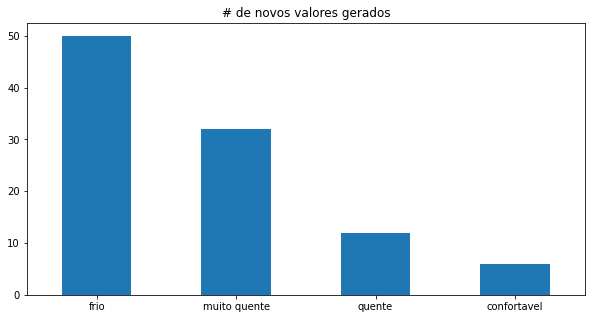

In [14]:
#contagem de valores gerados
output['new_class'].value_counts().plot.bar(figsize=(10, 5),
                                            rot=0,
                                            title="# de novos valores gerados");

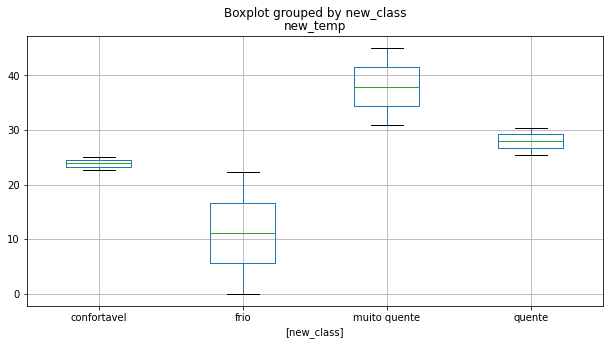

In [15]:
#distribuição do output produzido 
#conseguimos inferir a classificação novas temperaturas
#a partir de um dataset com 6 exemplos

output.boxplot(by='new_class', figsize=(10,5));


In [16]:
#sistema automático
def classify_temp():
  """Classifica o input do usuário."""

  ask = True
  while ask:
    #inpuut de temperatura
    temp = input("Insira a temperatura (graus Celsius): ")

    #transformar para numpy array
    temp = np.array(float(temp)).reshape(-1, 1)

    #realiza a classificação
    class_temp = clf.predict(temp)

    #transformação inversa para retornar a string original
    class_temp = le.inverse_transform(class_temp)

    #classificação
    print(f"A classificação da temperatura {temp.ravel()[0]} é:", class_temp[0])

    #perguntar
    ask = input("Nova classificação (y/n): ") == 'y'

In [17]:
#rodando o programa
classify_temp()

Insira a temperatura (graus Celsius): 19
A classificação da temperatura 19.0 é: frio
Nova classificação (y/n): n


**REGRESSÃO LINEAR COM SCIKIT-LEARN**

In [18]:
#dados 

x =[-1., -0.7777778, -0.55555556, -0.33333333, -0.11111111,
    0.11111111, 0.33333333, 0.55555555, 0.77777778, 1.]

y = [-1.13956201, -0.57117999, 0.21697033, 0.5425699, 0.49406657,
     1.14972239, 1.64228553, 2.1749824, 2.64773614, 2.95684282]
     

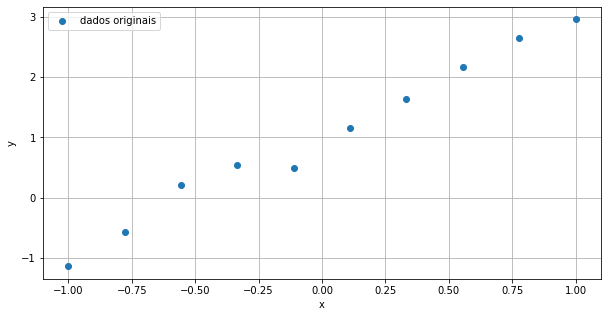

In [19]:
#plot dos dados 

plt.figure(figsize=(10, 5))
plt.plot(x, y, 'o', label='dados originais')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()


In [20]:
#transformando em numpy array

x,y = np.array(x).reshape(-1, 1), np.array(y).reshape(-1, 1)


In [28]:
#modelo
from sklearn.linear_model import LinearRegression

In [29]:
#reinando o modelo: y = a*x + b, valores reais (a, b) = (2, 1)
reg = LinearRegression()
reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
#coeficientes a,b estimados: 
#valores estimados usando o numpy diretamente
# a estimado no  numpy: 2.05414951
#b estimado no numpy: 0.96798296

print("a estimado:", reg.coef_.ravel()[0])
print("b estimado:", reg.intercept_[0])


a estimado: 1.9948614314030233
b estimado: 1.0114434139845843


In [37]:
#predição do modelo

y_pred = reg.predict(x)

In [38]:
#score do modelo

score = reg.score(x, y)
print("score:", score)

score: 0.9835890762556542


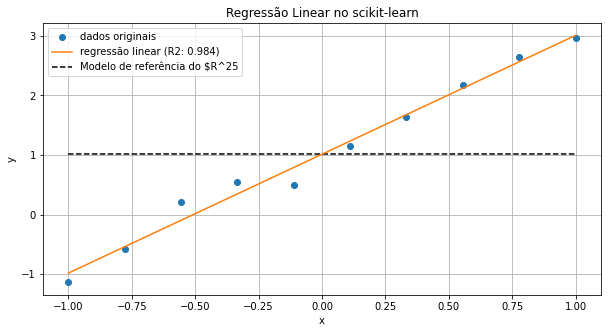

In [40]:
#plot dos dados

plt.figure(figsize=(10, 5))
plt.plot(x, y, 'o', label ='dados originais')
plt.plot(x, y_pred, label = 'regressão linear (R2: {:.3f})'.format(score))
plt.hlines(y=y.mean(), xmin=x.min(), xmax=x.max(), linestyle='dashed', label='Modelo de referência do $R^25')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regressão Linear no scikit-learn")
plt.grid()
plt.show()

**Regressão Linear 2**


In [43]:
#Função para cláculo do MSE

def mse(y_true, y_pred, is_ref=False):

  #mse modelo
  if is_ref:
    mse = ((y_true - y_true.mean()) **2).mean()
  else:
    mse = ((y_true - y_pred) ** 2).mean()

  return mse

In [44]:
#Função para cálculo do coeficiente de determinação R2

def r2(mse_reg, mse_ref):
  return 1 - mse_reg/mse_ref

In [45]:
#visualizando y e y_pred

print("y_true:", y.ravel())
print("y_pred:", y_pred.ravel())


y_true: [-1.13956201 -0.57117999  0.21697033  0.5425699   0.49406657  1.14972239
  1.64228553  2.1749824   2.64773614  2.95684282]
y_pred: [-0.98341802 -0.54011552 -0.09681295  0.34648961  0.78979215  1.23309468
  1.67639722  2.11969975  2.56300231  3.00630485]


In [46]:
#calculando o mse dos modelos

mse_reg = mse(y_true=y, y_pred=y_pred)
print("MSE do modelo de regressão:", mse_reg)
mse_ref = mse(y_true=y, y_pred=y_pred, is_ref=True)
print("MSE do modelo de referência:", mse_ref)

MSE do modelo de regressão: 0.027050401937392648
MSE do modelo de referência: 1.6483168381495084


In [47]:
#calculando o R2 score

r2_score = r2(mse_reg=mse_reg, mse_ref=mse_ref)
print("Coeficiente R2 do modelo implementado (calcullado:", r2_score)

Coeficiente R2 do modelo implementado (calcullado: 0.9835890762556543


In [48]:
#score retornado pelo scikit-learn
r2_score_skl = reg.score(x, y)
print("Coeficiente R2 do modelo implementado (scikit-learn):", r2_score_skl)

Coeficiente R2 do modelo implementado (scikit-learn): 0.9835890762556542
